# TP K-modes

Travail Réalisé par : 

* Adennour Chaoui
* Quang DAO
* Abdelmoumene Boumadane
* Hadrien Boulanger 

# K-modes

**Problème avec le K-means:** le K-Means ne peuvent pas gérer les données catégoriques, car il minimise explicitement la variance intra-cluster (distances au carré de la moyenne) comme défini dans l'espace euclidien. 

**=> le K-modes comme alternative**

Tandis que le K-Means calcule la distance euclidienne entre deux points, le K-Modes tente de minimiser une mesure de dissimilarité: il compte le nombre de "features" qui ne sont pas les mêmes. En utilisant des modes au lieu de moyens, K-Modes devient capable de gérer efficacement des données catégorielles.

## Algorithme:

**Définition du mode cluster:** si un jeu de données possède m attributs catégoriels, le vecteur mode Z est constitué de m valeurs catégorielles, chacune étant le mode d'un attribut.

1. Sélectionnez k modes initiaux, un pour chaque cluster.
2. Allouez un objet au cluster dont le mode est le plus proche en fonction de la distance de Hamming (La distance de Hamming entre deux lignes est simplement le nombre de colonnes où les deux lignes diffèrent). Mettez à jour le mode du cluster après chaque allocation.
3. Une fois que tous les objets ont été attribués aux clusters, testez à nouveau la dissemblance des objets par rapport aux modes actuels. Si un objet est trouvé de telle sorte que son mode le plus proche appartient à un autre cluster plutôt que son cluster actuel, réattribuez l'objet à ce cluster et mettez à jour les modes des deux clusters.
4. Répétez 3 jusqu'à ce qu'aucun objet n'ait changé de clusters après un test de cycle complet de l'ensemble de données.


Introduits en 1998 par Zhehue Huang, les k-modes constituent une alternative indispensable aux k-means lorsque les données disponibles sont catégoriques plutôt que numériques : 

1. Utiliser une simple mesure de dissimilarité de correspondance pour les objets catégoriels,
2. Remplacer les moyens des clusters par les modes
3. Utiliser une méthode basée sur la fréquence pour actualiser les modes

# Commenet ça marche ?

La méthode a été prorposé pour la premiere fois par Chaturvedi et al en (2001). K-modes clustering. Soit $x_{11}, x_{12},...,x_{nm}$ l'ensemble de données constitué de n objets avec m attributs. L'objectif principal de l'algorithme de kmodes est de regrouper les objets de données X en K clusters en minimisant la fonction de coût suivantes.

$$P(W,Q)=\sum_{l=1}^{k}\sum_{i=1}^{n}w_{il}d_{sim}(x_{i},q_{l})$$
$w_{fl}$  $N*K$ est une matrice ou chaque élement vaut 1 ou 0. $N$ . $d_{sim}(x_{i},q_{l})$ est la mésure de dissmiliraté et elle définie ainsi 
$$d_{sim}(x_{i},q_{l})=\sum_{j=1}^{m}\delta (x_{lj,q_{lj}})$$.
Le $\delta (x_{lj,z_{lj}})$ qui est la dissimiliraté est caluclé ainsi :
$$\delta (x_{lj,q_{lj}}) = \left\{\begin{matrix}
1 & si & x_{lj}=q_{lj}   \\ 
0 & si & x_{lj}\neq q_{lj}  
\end{matrix}\right.$$

# Déroulement de l'algorithme

**Étape 1** : Sélectionner au hasard les K modes initiaux des objets de données de telle sorte que Cj, j = 1,2,...,K 

**Étape 2** : Trouver la dissimilitude correspondante entre les K modes initiaux de chaque cluster et chaque objet de données en utilisant l'équation (2).

**Étape 3** : Évaluer l'adéquation à l'aide de l'équation (1)

**Étape 4** : Trouver les objets les plus proches des modes de regroupement initiaux.

**Étape 5** : Affecter les objets de données aux modes de centroïde de cluster les plus proches.

**Étape 6** : Mettre à jour les modes en appliquant la méthode basée sur la fréquence aux clusters nouvellement formées. 

**Étape 7** : Répétez les étapes 2,3,4 et 5 jusqu'à ce qu'il n'y ait plus de changement dans le vaisseau des objets de données. 

**Sortie** : Objets de données en cluster

# Implementaion de l'algorithme 

Nous avons impléménté l'algorithme et testé sur le jeux de donnée du dataset iris de Fisher

In [1]:
"""
KModes

"""
#imports
import time
import numpy as np
from scipy import stats

class K_modes:
    def __init__(self,n_clusters):
        self.n_clusters = n_clusters
        self.modes = []
        self.labels = []

    def fit(self,X_train):
        size = X_train.shape
        self.labels = [0]*size[0]
        #random selection of culster modes
        modes = np.random.choice(size[1], self.n_clusters, replace=False)
        not_stable = True
        for element in modes:
            self.modes.append(X_train[element])
        

        while not_stable : 

            #calculate the distances between the modes and all the individuals
            for i in range (0,size[0]):
                distance = [0]*self.n_clusters
                for k in range (0,self.n_clusters):
                    for j in range (0,size[1]):
                        distance[k] = (distance[k] + 1) if X_train[i][j] != self.modes[k][j] else distance[k]

            # assign the individual to the cluster with minimum distance 
                self.labels[i] = distance.index(min(distance))

            #keep the old modes to compare later
            modes_old = self.modes[:]

            #claculate the new modes 
            for i in range (0,self.n_clusters):
                self.modes[i] = stats.mode(X_train[np.array(self.labels) == i])[0][0]
            
            #check if changes occured to the modes
            not_stable = False 
            for i in range (0,len(self.modes)):
                if not(np.array_equal(self.modes[i],modes_old[i])):
                    not_stable =  True

        return self




#test data 
data = np.array([[1,2,1,2,3],[1,1,1,2,2],
                [3,1,2,2,1],[1,2,2,1,3],
                [3,3,3,2,1],[1,1,1,1,2],
                [1,3,1,3,3],[3,1,2,2,3],
                [1,1,2,3,1],[1,2,2,1,3]])


start_time = time.time()
k = K_modes(3)
k.fit(data)
print(k.modes)
print(k.labels)
print("--- %s seconds ---" % (time.time() - start_time))

[array([1, 1, 2, 1, 3]), array([1, 3, 1, 2, 3]), array([1, 1, 1, 1, 2])]
[1, 2, 0, 0, 1, 2, 1, 0, 0, 0]
--- 0.030307769775390625 seconds ---


In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()
iris=np.array(iris)
sns.load_dataset('iris')
start_time = time.time()
k = K_modes(5)
k.fit(iris)
print(k.modes)

print("--- %s seconds ---" % (time.time() - start_time))
print(k.labels)

[array([6.3, 2.8, 4.5, 1.3, 'versicolor'], dtype=object), array([6.5, 3.0, 5.1, 1.8, 'virginica'], dtype=object), array([5.1, 3.4, 1.5, 0.2, 'setosa'], dtype=object), array([5.0, 3.0, 1.4, 0.2, 'setosa'], dtype=object), array([6.7, 3.1, 1.5, 0.2, 'setosa'], dtype=object)]
--- 0.05040335655212402 seconds ---
[2, 3, 2, 4, 3, 2, 2, 2, 3, 4, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2, 3, 4, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 4, 1, 1, 1, 1, 1, 0, 1, 1, 1]


# Exploration du k-mode et comparaison avec k-means

Dans cet exemple on déroule les deux algorithmes k-mode et k-means sur le dataset Soybean collécté en 1987, le dataset ne contient que de variables qualitatifs, avec une colone **roots** qui prend quatres modalité D1,D2,D3,D4. 
Chaque cas est étiqueté comme l'une des quatre maladies : la maladie du diaporama, la maladie du charbon, la maladie des racines du rhizoctonia et la maladie du phytophthora. À l'exception de la maladie du phytophthora, toutes les autres maladies ont 10 cas chacune, la maladie du phytophthora en a 17.
On n'utilisera pas cette colonne en clustering mais pour comparer les algorithmes en clustering.
On utilise dans cette partie une bibliotheque k-mode trés utilisé chez la communuté pour l'utilisation de l'algorithme k-modes en production.


Le dataset contient 35 colonne avec 47 instances : 

   1. date:		april,may,june,july,august,september,october.
   2. plant-stand:	normal,lt-normal.
   3. precip:		lt-norm,norm,gt-norm.
   4. temp:		lt-norm,norm,gt-norm.
   5. hail:		yes,no.
   6. crop-hist:	diff-lst-year,same-lst-yr,same-lst-two-yrs, same-lst-sev-yrs.
   7. area-damaged:	scattered,low-areas,upper-areas,whole-field.
   8. severity:	minor,pot-severe,severe.
   9. seed-tmt:	none,fungicide,other.
   10. germination:	90-100%,80-89%,lt-80%.
   11. plant-growth:	norm,abnorm.
   12. leaves:		norm,abnorm.
   13. leafspots-halo:	absent,yellow-halos,no-yellow-halos.
   14. leafspots-marg:	w-s-marg,no-w-s-marg,dna.
   15. leafspot-size:	lt-1/8,gt-1/8,dna.
   16. leaf-shread:	absent,present.
   17. leaf-malf:	absent,present.
   18. leaf-mild:	absent,upper-surf,lower-surf.
   19. stem:		norm,abnorm.
   20. lodging:    	yes,no.
   21. stem-cankers:	absent,below-soil,above-soil,above-sec-nde.
   22. canker-lesion:	dna,brown,dk-brown-blk,tan.
   23. fruiting-bodies:	absent,present.
   24. external decay:	absent,firm-and-dry,watery.
   25. mycelium:	absent,present.
   26. int-discolor:	none,brown,black.
   27. sclerotia:	absent,present.
   28. fruit-pods:	norm,diseased,few-present,dna.
   29. fruit spots:	absent,colored,brown-w/blk-specks,distort,dna.
   30. seed:		norm,abnorm.
   31. mold-growth:	absent,present.
   32. seed-discolor:	absent,present.
   33. seed-size:	norm,lt-norm.
   34. shriveling:	absent,present.
   35. roots:		norm,rotted,galls-cysts.


les classes sont distribués ainsi: 
   1. D1: 10
   2. D2: 10
   3. D3: 10
   4. D4: 17

Michalski,R.S. Learning by being told and learning from
     examples: an experimental comparison of the two methodes of knowledge
     acquisition in the context of developing an expert system for soybean
     desease diagnoiss", International Journal of Policy Analysis and
     Information Systems, 1980, 4(2), 125-161.
 Donor: Doug Fisher (dfisher%vuse@uunet.uucp)
 Date: 1987
   
Dans ce cas les k-moyennes ne peuvent pas être utilisées avec cette matrice car elles minimisent explicitement la variance intra-groupe (distances au carré de la moyenne) telle que définie dans l'espace euclidien. En général, si les cluster doivent révéler quelque chose sur les données, les dimensions associées aux catégories ne doivent pas être forcées dans une représentation spatiale. Les marqueurs "1" et "0" doivent être correctement appelés "Vrai" et "Faux".

In [3]:
import pandas as pd 
import time
import seaborn as sns
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from kmodes.kmodes import KModes

In [4]:
df = pd.read_csv("soybean-small.data")

In [5]:
#Chargement du dataset
cols_names = ['date', 'plant-stand','precip',
              'temp', 'hail', 'deg-malig', 'crop-hist',
              'area-damaged', 'severity','seed-tmt',
              'germination','plant-growth','leaves','leafspots-halo',
             'leafspots-marg','leafspot-size','leaf-shread','leaf-malf','leaf-mild',
              'stem','lodging','stem-cankers','canker-lesion','fruiting-bodies',
             'external decay','mycelium','int-discolor','sclerotia','fruit-pods',
             'fruit spots','seed','mold-growth','seed-discolor','seed-size','shriveling','roots']# read the data
df = pd.read_csv('soybean-small.data',names=cols_names)
for column in df.columns:
    df[column]=df[column].astype(str)
df.head()

,date,plant-stand,precip,temp,hail,deg-malig,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,4,0,2,1,1,1,0,1,0,2,...,0,0,4,0,0,0,0,0,0,D1
1,5,0,2,1,0,3,1,1,1,2,...,0,0,4,0,0,0,0,0,0,D1
2,3,0,2,1,0,2,0,2,1,1,...,0,0,4,0,0,0,0,0,0,D1
3,6,0,2,1,0,1,1,1,0,0,...,0,0,4,0,0,0,0,0,0,D1
4,4,0,2,1,0,3,0,2,0,2,...,0,0,4,0,0,0,0,0,0,D1


In [6]:
#On elimine la colonne classe et on garde que les autres columns pour le clustering
y=df.iloc[:,-1:]
train_X = df.drop(columns='roots')

In [7]:
train_X.iloc[:,1].unique()

array(['0', '1'], dtype=object)

On fait un encodage en label des métadonnée, l'algorithme k-mode permet d'utilisé un encodage en label meme si les traits ne sont pas ordinale 

In [8]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

d = defaultdict(LabelEncoder)

le = LabelEncoder()
train_X = train_X.apply(lambda x: d[x.name].fit_transform(x))

In [9]:
train_X

,date,plant-stand,precip,temp,hail,deg-malig,crop-hist,area-damaged,severity,seed-tmt,...,mycelium,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling
0,4,0,2,1,1,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,5,0,2,1,0,3,1,0,1,2,...,0,0,0,0,0,0,0,0,0,0
2,3,0,2,1,0,2,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,6,0,2,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,2,1,0,3,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
5,5,0,2,1,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,3,0,2,1,0,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,3,0,2,1,0,1,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
8,6,0,2,1,0,3,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,6,0,2,1,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


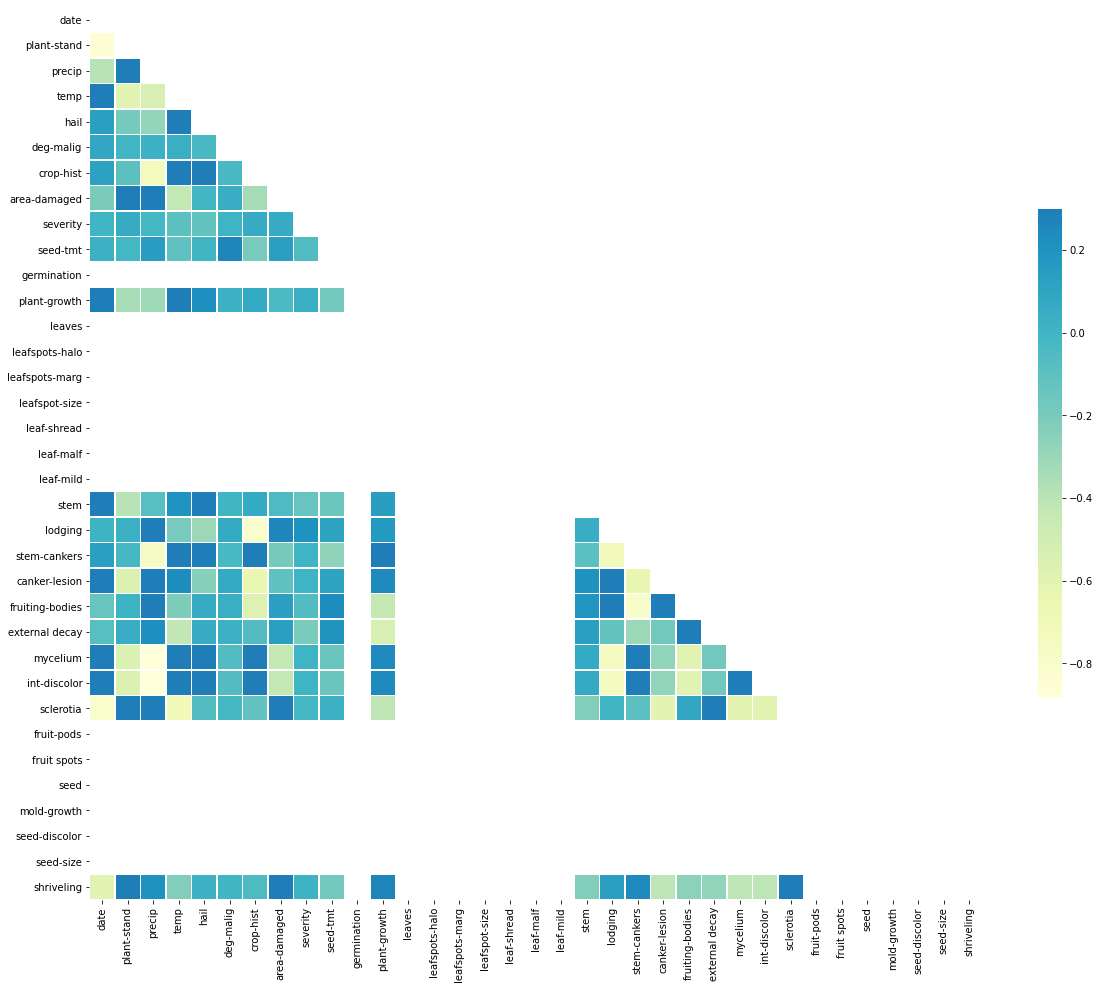

In [10]:
#Affichage des corrélation
corr = train_X.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu", vmax=.30, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## Initialisation en K-modes 
Il existe trois type d'initialisation dans la litérature en k-modes
* **Initialisation de Huang[1997, 1998]** : la  méthode calcule les fréquences de toutes les catégories pour tous les attributs et attribue les catégories les plus fréquentes de manière égale aux K-modes initiaux.
* **Initialisation de Cao al. [2009]** : la méthode d'initialisation prend en compte la distance entre les objets et la densité des objets. elle sélectionne l'objet ayant la densité moyenne maximale comme premier centre de regroupement initial. Pour le calcul des autres centres de cluster, la distance entre l'objet et les clusters déjà connues, et la densité moyenne de l'objet sont prises en compte.La méthode vise à choisir un centre de cluster diversifié qui peut améliorer le regroupementrésultats, mais un critère uniforme pour la sélection des centres de clusters K-initial n'est pasfournis.
* **Initlisation aléatoire**: initilisation aléatoire

### Comparaison des trois initilisation

In [11]:
import numpy as np
import matplotlib.pyplot as plt 
cost_huang = []
cost_cao = []
cost_rand = []
for num_clusters in list(range(1,10)):
    kmode_cao = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=0)
    km_huang = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=0)
    km_rand = KModes(n_clusters=num_clusters, init = "random", n_init = 1, verbose=0)
    kmode_cao.fit_predict(train_X)
    km_huang.fit_predict(train_X)
    km_rand.fit_predict(train_X)
    cost_cao.append(kmode_cao.cost_)
    cost_huang.append(km_huang.cost_)
    cost_rand.append(km_rand.cost_)
x = np.array([i for i in range(1,10,1)])

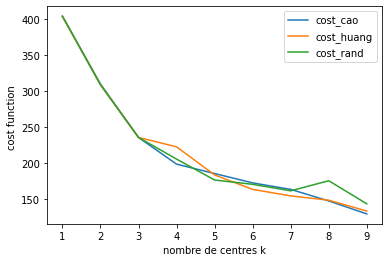

In [12]:
plt.plot(x, cost_cao, label = "cost_cao")
plt.plot(x, cost_huang, label = "cost_huang")
plt.plot(x, cost_rand, label = "cost_rand")
plt.xlabel('nombre de centres k')
plt.ylabel('cost function ')
plt.legend()
plt.show()

On re marque que pour les différentes initisaltion de K l'initialisation avec cao est celle qui donnent en générale la perte minimale a la fin.

# Compraison des performance et vitesse

Dans cet partie on fait un clustering en 2 means parcequ'on sait que le dataset est binaire "selon la colone classe", 

In [50]:
km_cao = KModes(n_clusters=4, init = "random", n_init = 1, verbose=0)
start_time = time.time()
fitClusters_cao = km_cao.fit_predict(train_X)
end_time = time.time()
print("le temps d'excution de 4-modes sur le dataset est",end_time-start_time)

le temps d'excution de 4-modes sur le dataset est 0.04015612602233887


## Affichage des cluster selon les modalité des classe
Dans cette section on affiche la distribution des classes selon les modalités des classes, cela permet de retrouver les modes de chaque classe.

In [51]:
#Attacher la catégorie au dataframe
df_viz = df.copy()
df_viz['cluster']=fitClusters_cao

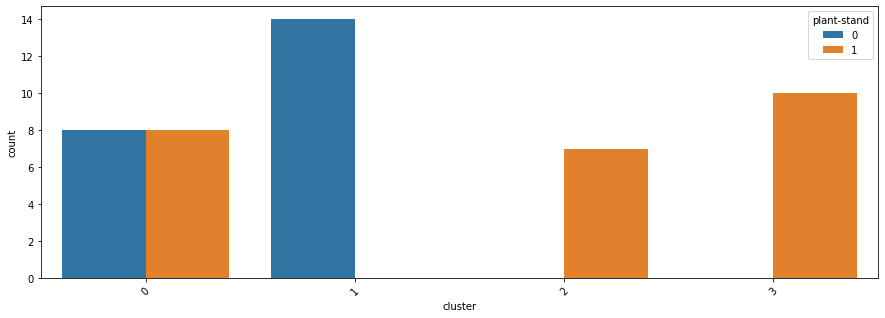

In [52]:
plt.subplots(figsize = (15,5))
g = sns.countplot(data=df_viz,x="cluster",hue="plant-stand",orient="h")
plt.xticks(rotation=45);

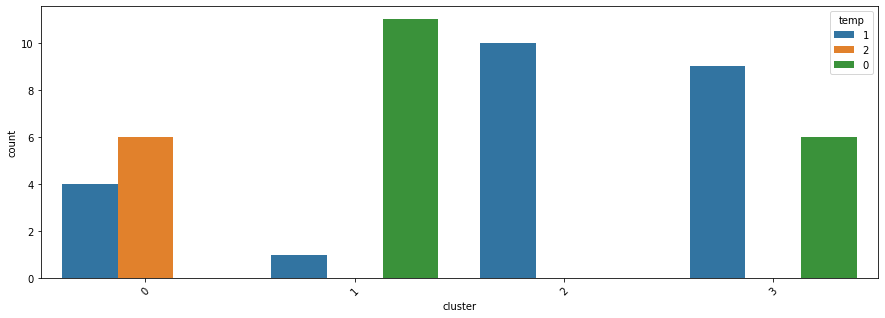

In [43]:
plt.subplots(figsize = (15,5))
g = sns.countplot(data=df_viz,x="cluster",hue="temp",orient="h")
plt.xticks(rotation=45);

In [44]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df.drop(columns=['roots']).columns
clusterCentroidsDf.apply(lambda x: d[x.name].inverse_transform(x))

,date,plant-stand,precip,temp,hail,deg-malig,crop-hist,area-damaged,severity,seed-tmt,...,mycelium,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling
0,5,0,0,2,1,1,2,1,0,0,...,2,1,0,4,0,0,0,0,0,0
1,0,1,2,0,0,3,1,2,0,1,...,0,0,3,4,0,0,0,0,0,0
2,3,0,2,1,0,1,0,1,0,2,...,0,0,0,4,0,0,0,0,0,0
3,0,1,2,1,0,1,1,2,1,0,...,0,0,3,4,0,0,0,0,0,1


## Visualisation des performance du model

Dans cet section on test les performance du model sur plusieurs métriques, en utilisant effectif du dataset

In [45]:
labels_true = LabelEncoder().fit_transform(y)

/home/moumene/.conda/envs/ds/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Homogénité + Complitude + v_measure_score + adjusted_mutual_info_score

Dans cette partie on compare le score d'[Homogénité](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html), [complitude](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html?highlight=completeness_score#sklearn.metrics.completeness_score), [V-measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html?highlight=v_measure_score#sklearn.metrics.v_measure_score) et [AMI](adjusted_mutual_info_score)

In [46]:
# Homogénité 
from sklearn import metrics
metrics.homogeneity_score(labels_true, fitClusters_cao)

0.9151415667809761

In [47]:
#Complitude 
metrics.completeness_score(labels_true, fitClusters_cao)

0.904482712914538

In [48]:
#V-measure
metrics.v_measure_score(labels_true, fitClusters_cao)

0.9097809215443377

In [49]:
#AMI
metrics.adjusted_mutual_info_score(labels_true, fitClusters_cao)

0.9018517875952138

## Compraison de la vitessse et performance avec un k-means

Il est démontré que l'algorithme permet d'obtenir une convergence avec la la complexité temporelle en ce qui concerne le nombre d'objets de données. Les auteurs soulignent également qu'en général, l'algorithme des modes K est plus rapide que l'algorithme des moyennes K car il nécessite moins d'itérations pour converger.

Dans cette partie on va comparer la vitesse d'un k-means appliqué sur les données encodées en onehotencoding et l'algorithme k-mode

In [24]:
X_train_kmeans = pd.get_dummies(train_X,columns=train_X.columns,drop_first=True)
X_train_kmeans

,date_1,date_2,date_3,date_4,date_5,date_6,plant-stand_1,precip_1,precip_2,temp_1,...,stem-cankers_1,stem-cankers_2,stem-cankers_3,canker-lesion_1,fruiting-bodies_1,external decay_1,mycelium_1,int-discolor_1,sclerotia_1,shriveling_1
0,0,0,0,1,0,0,0,0,1,1,...,1,0,0,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,1,...,1,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,1,...,1,0,0,1,1,0,0,0,0,0
5,0,0,0,0,1,0,0,0,1,1,...,1,0,0,1,1,0,0,0,0,0
6,0,0,1,0,0,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,0
7,0,0,1,0,0,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,0
8,0,0,0,0,0,1,0,0,1,1,...,1,0,0,1,1,0,0,0,0,0
9,0,0,0,0,0,1,0,0,1,1,...,1,0,0,1,1,0,0,0,0,0


Pour utiliser un k-means sur des données catégoriques, il faut les transformer déjà avec l'one-hot-encoding qui est une représentation très éparse et gourmande en mémoire

In [39]:
from sklearn.cluster import KMeans
import time 

start_time = time.time()
fitClusters_kmeans = KMeans(n_clusters=4, random_state=1).fit_predict(X_train_kmeans)
end_time = time.time()
end_time-start_time

0.05536341667175293

On constate déjà que l'exécution avec k-modes est beaucoup plus rapide que le k-means

In [33]:
fitClusters_kmeans

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

In [34]:
from sklearn import metrics

In [35]:
#Homogénité
metrics.homogeneity_score(labels_true, fitClusters_kmeans)

1.0000000000000002

In [36]:
#Complétude
metrics.completeness_score(labels_true, fitClusters_kmeans)

1.0

In [37]:
#V-measure
metrics.v_measure_score(labels_true, fitClusters_kmeans)

1.0000000000000002

In [38]:
#mutual-information
metrics.adjusted_mutual_info_score(labels_true, fitClusters_kmeans)

1.0

Les performances du k-mode sont meilleures que le k-means 

## K-modes vs K-means + one-hot encoding:
- Kmeans + one-hot encoding augmentera considérablement la taille de l'ensemble de données si les attributs catégoriels ont un grand nombre de catégories. Cela rendra le K-means coûteuses en calcul.
- Le cluster signifie n'a pas de sens puisque le 0 et le 1 ne sont pas les valeurs réelles des données. Le K-modes, d'autre part, produisent des modes de cluster qui sont les données réelles et rendent donc les clusters interprétables.

## Inconvénients du K-modes:
- Lorsque les types de données sont mélangés
- Il compte simplement le nombre de dissemblances mais ne considère pas quels "features" sont différents.

Une meilleure etude des cluster consisetra a les caractésisé avec les variables qualtitatives et les modalité de chaque variables en utilisant les test statistiques (test de chi2) 